
# Bank Marketing

# Problem Statement
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

# Data Definition
age:       age of the customer (int)

job:       type of job (string)

education: education level (string)

default:   has credit card in default or not (string)

balance:   average yearly balance (int)

housing:   has housing loan or not (string)

loan:      has personal loan or not (string)

contact:   contact communication type (string)

day:       last contact day of the week (int)

month:     last contact month of the year (int)

duration:  last contact duration in seconds (int)

campaign:  number of contacts performed during this campaign and for this client (int)

pdays:     number of days that passed by after the client was last contacted from a previous campaign (int)

previous:  number of contacts performed before this campaign and for this client (int)

poutcome:  outcome of the previous marketing campaign (string)

y:         has the client subscribed a term deposit? (string,Target)


# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings ('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import mutual_info_classif

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# 2. Read data

In [2]:
#reading the csv file
df=pd.read_csv(r"D:\Imarticus\Capstone\bank customers details.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1,0,unknown,no


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
#check for duplicate records
if df.duplicated().sum()==0:
    print('No duplicate records present')
else:
    print(f'{df.duplicated().sum()} number of duplicate records are found')

No duplicate records present


In [5]:
df_OG=df.copy() #having a copy of the original dataframe

# 3. Understanding the Data

In [6]:
#number of rows and columns
df.shape

(45211, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45063 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45159 non-null  float64
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 5.9+ MB


 We see that "balance" and "duration" column have null values

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45063.000000,45211.000000,45159.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1363.701773,15.806419,258.178414,2.763841,40.197828,0.580323
std,10.618762,3047.420845,8.322476,257.583262,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1430.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
#checking for missing values
missing_values=df.isnull().sum()
missing_values[missing_values>0]

balance     148
duration     52
dtype: int64

In [10]:
#there are two attributes with missing values in them

In [11]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('No. of unique values= ',df[i].nunique(),'\n')

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
No. of unique values=  77 

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
No. of unique values=  12 

marital
['married' 'single' 'divorced']
No. of unique values=  3 

education
['tertiary' 'secondary' 'unknown' 'primary']
No. of unique values=  4 

default
['no' 'yes']
No. of unique values=  2 

balance
[2.1430e+03 2.9000e+01 2.0000e+00 ... 8.2050e+03 1.4204e+04 1.6353e+04]
No. of unique values=  7161 

housing
['yes' 'no']
No. of unique values=  2 

loan
['no' 'yes' 'NO' 'No']
No. of unique values=  4 

contact
['unknown' '?' 'cellular' 'telephone']
No. of unique values=  4 

day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  

## Cleaning the data

It is seen that loan attribute should contain either yes or a no. But "no" is present in different forms. If retained in the 
 same way, the machine will treat "no" as 3 different variables. Hence it is required to bring them in 1 form

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
df.pdays.unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [14]:
# We see that pdays has a value "-1", which doesn't really makes sense.
# Hence we need to replace it with "1"

In [15]:
df['pdays']=df['pdays'].replace(-1,1)

In [16]:
df['loan']=df['loan'].replace('NO','no')

In [17]:
df['loan']=df['loan'].replace('No','no')

In [18]:
df['loan']=df['loan'].replace('noo','no')

In [19]:
print('Loan column before treatment')
for i in df_OG.columns:
    if i=='loan':
        print(i)
        print(df_OG[i].unique())
        print('No. of unique values= ',df_OG[i].nunique(),'\n')
print('Loan column after treatment')
for i in df.columns:
    if i=='loan':
        print(i)
        print(df[i].unique())
        print('No. of unique values= ',df[i].nunique(),'\n')

Loan column before treatment
loan
['no' 'yes' 'NO' 'No']
No. of unique values=  4 

Loan column after treatment
loan
['no' 'yes']
No. of unique values=  2 



In [20]:
#loan column is cleaned

We see that contact column has '?' in it. It needs to be replaced with a suitable value from its table.
For that we will convert '?' with NaN

In [21]:
df['contact']=df.contact.replace('?',np.nan)

In [22]:
df['contact'].unique()

array(['unknown', nan, 'cellular', 'telephone'], dtype=object)

In [23]:
df['contact'].mode()

0    cellular
Name: contact, dtype: object

In [24]:
df['contact'].isnull().sum()

75

In [25]:
df['contact']=df['contact'].replace(np.nan,'cellular')

In [26]:
print('contact column before treatment')
for i in df_OG.columns:
    if i=='contact':
        print(i)
        print(df_OG[i].unique())
        print('No. of unique values= ',df_OG[i].nunique(),'\n')
print('contact column after treatment')
for i in df.columns:
    if i=='contact':
        print(i)
        print(df[i].unique())
        print('No. of unique values= ',df[i].nunique(),'\n')

contact column before treatment
contact
['unknown' '?' 'cellular' 'telephone']
No. of unique values=  4 

contact column after treatment
contact
['unknown' 'cellular' 'telephone']
No. of unique values=  3 



In [27]:
#contact column is cleaned

In [28]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('No. of unique values= ',df[i].nunique(),'\n')

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
No. of unique values=  77 

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
No. of unique values=  12 

marital
['married' 'single' 'divorced']
No. of unique values=  3 

education
['tertiary' 'secondary' 'unknown' 'primary']
No. of unique values=  4 

default
['no' 'yes']
No. of unique values=  2 

balance
[2.1430e+03 2.9000e+01 2.0000e+00 ... 8.2050e+03 1.4204e+04 1.6353e+04]
No. of unique values=  7161 

housing
['yes' 'no']
No. of unique values=  2 

loan
['no' 'yes']
No. of unique values=  2 

contact
['unknown' 'cellular' 'telephone']
No. of unique values=  3 

day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18

In [29]:
missing_values[missing_values>0]

balance     148
duration     52
dtype: int64

In [30]:
df['balance']=df['balance'].fillna(df.balance.mean())

In [31]:
missing_values=df.isnull().sum()
missing_values[missing_values>0]

duration    52
dtype: int64

In [32]:
df['duration']=df['duration'].fillna(df.balance.mean())

In [33]:
df['duration_mins']=df['duration']/60

In [34]:
df=df.drop('duration',axis=1)

In [35]:
df.balance.unique()

array([2.1430e+03, 2.9000e+01, 2.0000e+00, ..., 8.2050e+03, 1.4204e+04,
       1.6353e+04])

In [36]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [37]:
month_name_to_number={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

In [38]:
df['month_number']=df['month'].map(month_name_to_number)

In [39]:
df=df.sort_values(by='month_number')

In [40]:
#Let us divide the age column into different categories

In [41]:
bins=np.arange(0,df['age'].max()+10,10)

In [42]:
df['Age Group'] = pd.cut(df['age'], bins=bins, labels=[f"{i}-{i+9}" for i in range(0, df['age'].max(), 10)])

In [43]:
df['Age Group'].unique()

['40-49', '50-59', '30-39', '20-29', '70-79', '60-69', '90-99', '80-89', '10-19']
Categories (10, object): ['0-9' < '10-19' < '20-29' < '30-39' ... '60-69' < '70-79' < '80-89' < '90-99']

In [44]:
age_mapping={'10-19':1,'20-29':2,'30-39':3,'40-49':4,'50-59':5,'60-69':6,'70-79':7,'80-89':8,'90-99':9}

In [45]:
df['Age code']=df['Age Group'].map(age_mapping)

In [46]:
df['Age code'].unique()

array([4., 5., 3., 2., 7., 6., 9., 8., 1.])

# 4. Data Visualisation

In [47]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'duration_mins', 'month_number', 'Age Group',
       'Age code'],
      dtype='object')

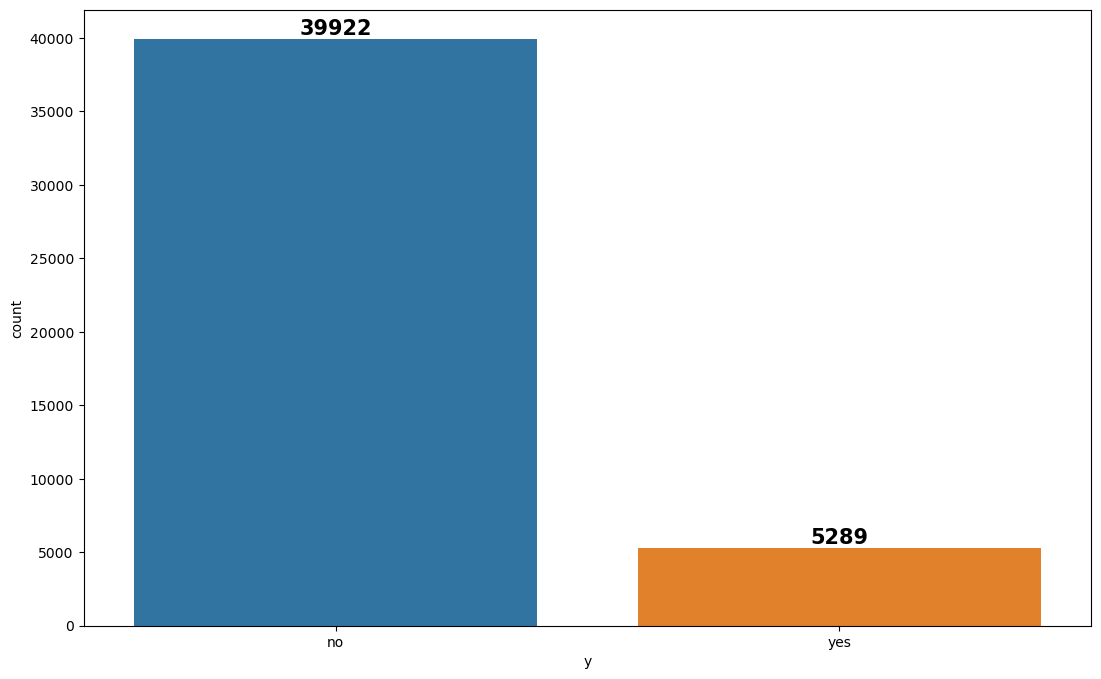

In [48]:
plt.figure(figsize=(13,8))
sns.countplot(data=df,x=df.y)
value_1 = df["y"].value_counts()
for index, value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)


Most of the people do not subscribe to the term deposit

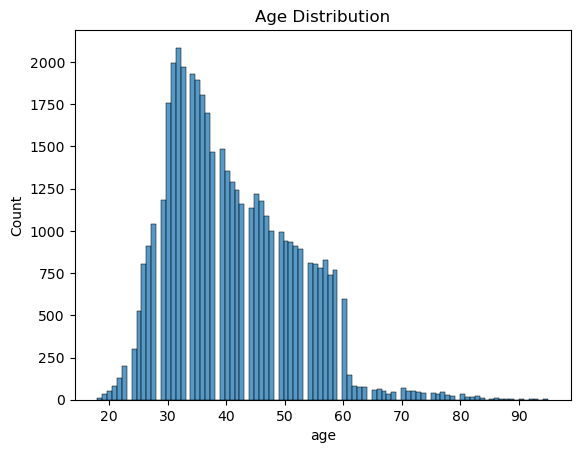

In [49]:
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.show()

Most the the customers are middle aged between 30-40 years

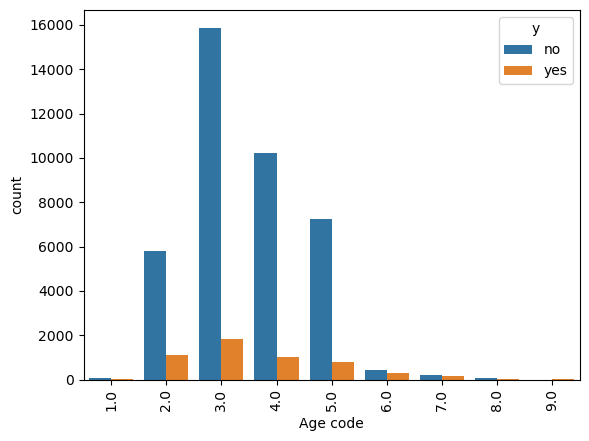

In [50]:
sns.countplot(data=df,x=df['Age code'],hue=df.y)
plt.xticks(rotation=90)
plt.show()

The people who are most likely to subscribe to a term deposit belong to the age between 30-40 years.

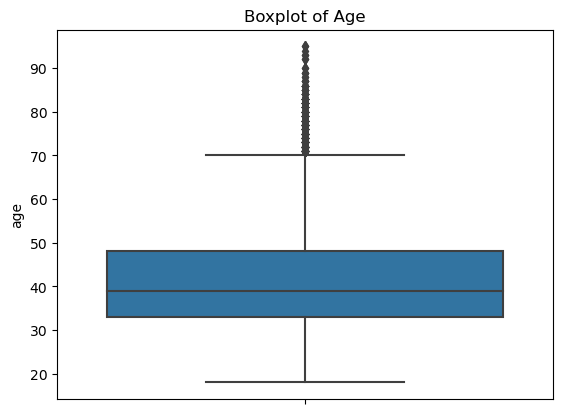

In [51]:
sns.boxplot(y=df['age'])
plt.title('Boxplot of Age')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'blue-collar'),
  Text(1, 0, 'management'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'services'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'unemployed'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

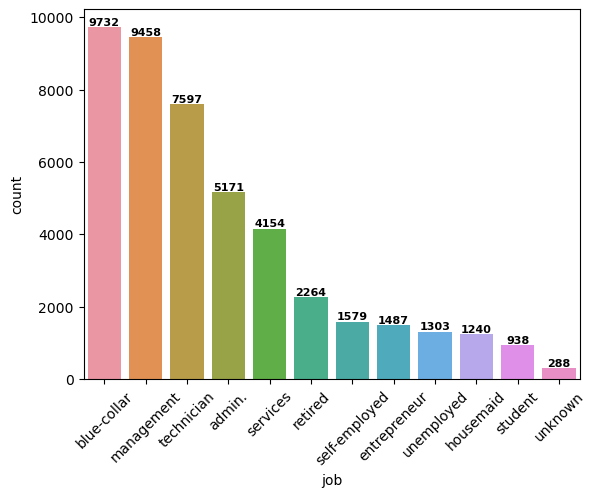

In [52]:
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
value_2 = df["job"].value_counts()
for index, value in enumerate(value_2.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=8)
plt.xticks(rotation=45)


Most of the bank customers are blue-collar workers, next being management profiles and then technician

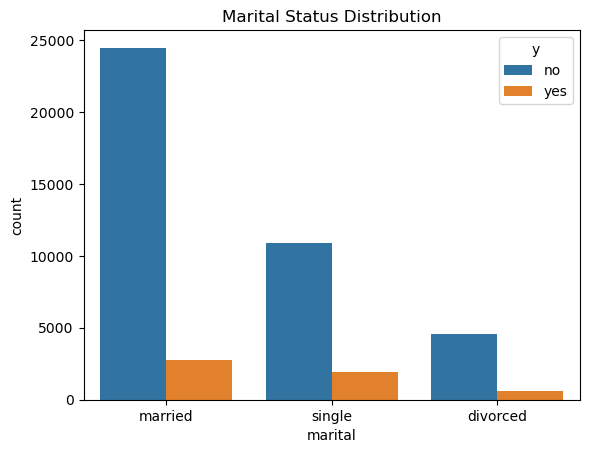

In [53]:
sns.countplot(data=df, x='marital',hue=df.y)
plt.title('Marital Status Distribution')
plt.show()

Most customers are married

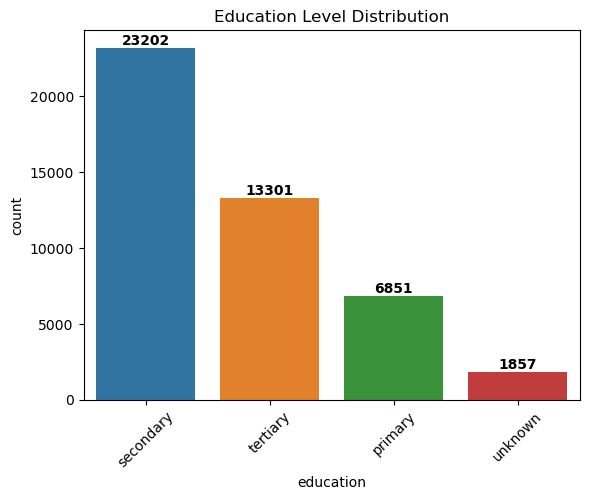

In [54]:
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
value_4 = df["education"].value_counts()
for index, value in enumerate(value_4.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=10)
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()

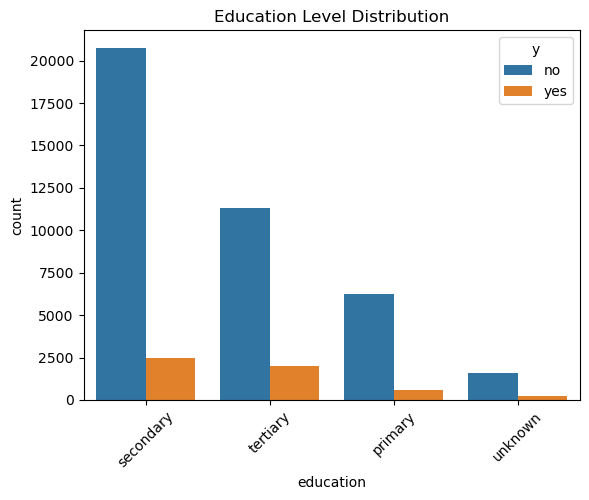

In [55]:
sns.countplot(data=df, x='education', order=df['education'].value_counts().index,hue=df.y)
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()

Most of them have secondary education, with a very few having unknown education. Maybe they don't have any educational background

In [56]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'duration_mins', 'month_number', 'Age Group',
       'Age code'],
      dtype='object')

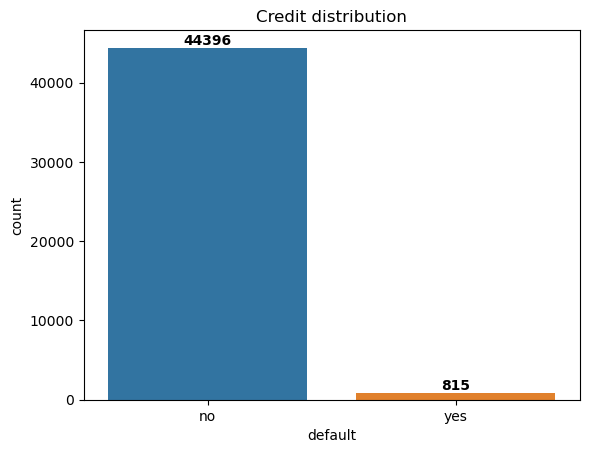

In [57]:
sns.countplot(data=df, x='default')
value_5 = df["default"].value_counts()
for index, value in enumerate(value_5.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=10)
plt.title('Credit distribution')
plt.show()

Most of the people do not borrow the funds from the bank

<Axes: >

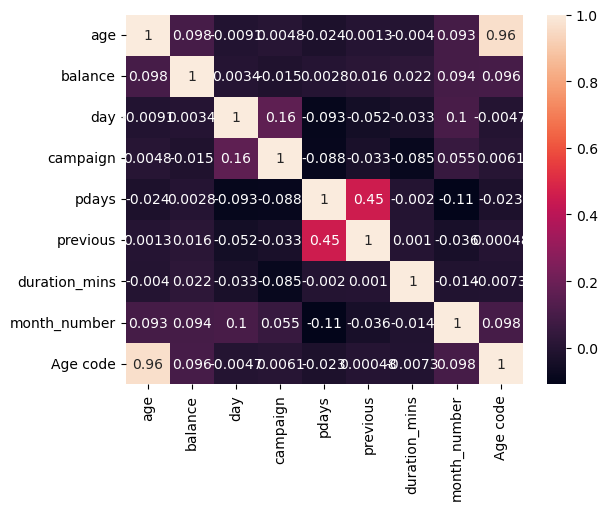

In [58]:
sns.heatmap(df[list(df.describe().columns)].corr(),annot=True)

In [59]:
df.groupby('day')['duration_mins'].mean().values

array([4.68602484, 4.1439933 , 4.56506024, 4.38115806, 4.55055418,
       4.45805743, 4.57808579, 4.27528779, 4.207885  , 4.77102417,
       4.263286  , 4.46870451, 4.61991385, 4.46349301, 4.57146213,
       4.94062426, 4.59461062, 4.0522747 , 4.37582053, 3.94173881,
       4.34933121, 4.4207919 , 4.54811857, 4.73216636, 4.18406746,
       3.95508857, 3.78580137, 3.76191257, 4.03551098, 4.64837277,
       3.01715915])

In [60]:
len(df.day)

45211

In [61]:
len(df.groupby('day')['duration_mins'].mean().values)

31

Text(0, 0.5, 'Duration in minutes')

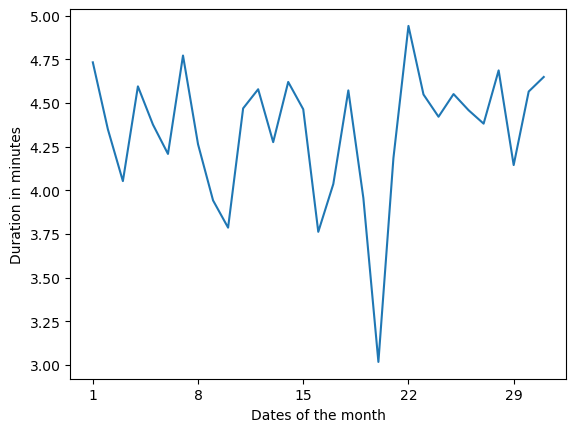

In [62]:
sns.lineplot(x=df.day.unique(),y=df.groupby('day')['duration_mins'].mean().values)
plt.xticks(range(1,32,7))
plt.xlabel('Dates of the month')
plt.ylabel('Duration in minutes')

A higer call duration(average) is found during the month end, it is around 5 minutes. This means that people are in the need of money towards the month end

Text(0, 0.5, 'Duration in minutes')

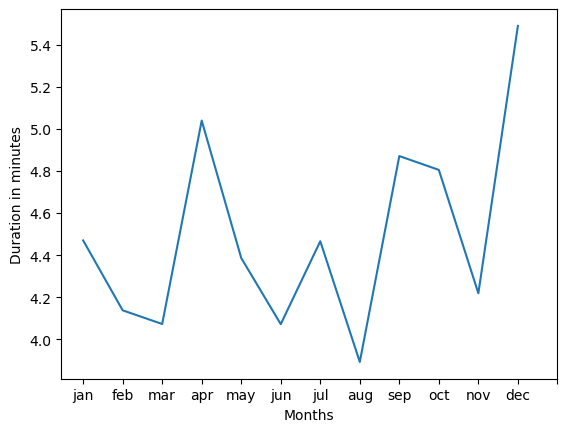

In [63]:
sns.lineplot(x=df.month.unique(),y=df.groupby('month_number')['duration_mins'].mean().values)
plt.xticks(range(0,13))
plt.xlabel('Months')
plt.ylabel('Duration in minutes')

The call duration is quite high from April. The reason maybe that it is the beginning of the new financial year, just after March.
The call duration is at its peak towards the year end for upto 5 1/2 minutes

<Axes: xlabel='age', ylabel='balance'>

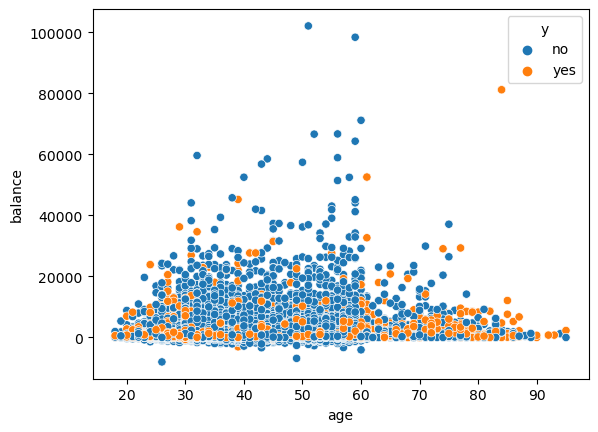

In [64]:
sns.scatterplot(data=df,x=df.age,y=df.balance,hue=df.y)

It is seen from the scatter plot that majority of the people belonging to all the age group's balance is between 0 to 30,000.
Among them, most of the people who subscribe to the term deposit's balance is around 10,000. This shows that the people only who are in need of money subscribe to the tern deposits.

In [65]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'duration_mins', 'month_number', 'Age Group',
       'Age code'],
      dtype='object')

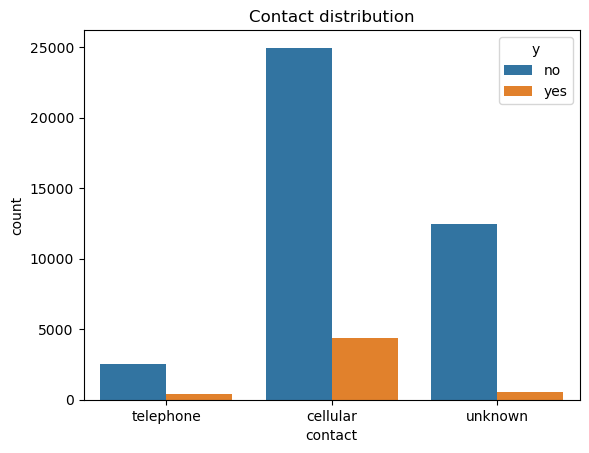

In [66]:
sns.countplot(data=df, x='contact',hue=df.y)
plt.title('Contact distribution')
plt.show()

Cellular is the most popular type of contact

<Axes: xlabel='age', ylabel='campaign'>

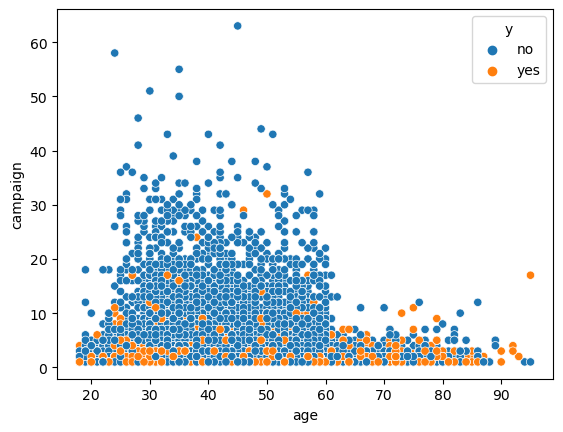

In [67]:
sns.scatterplot(data=df,x=df.age,y=df.campaign,hue=df.y)

The plot shows that if the number of calls is too high druing this campaign, that is more than 5 times, the customer might not be interested in subscribing to the term deposit at all. 
Thus the number of contact must be optimum with effectiveness in order to attract the customers.

<Axes: xlabel='age', ylabel='previous'>

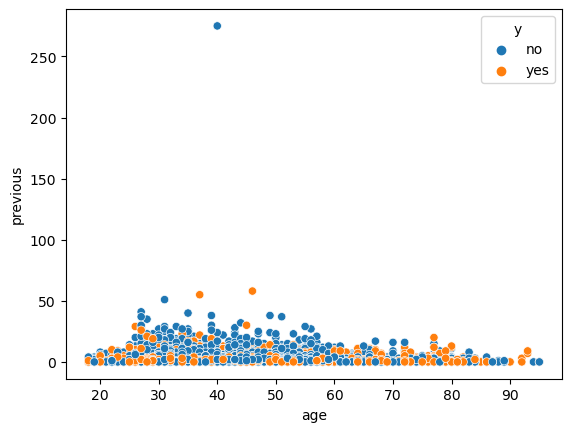

In [68]:
sns.scatterplot(data=df,x=df.age,y=df.previous,hue=df.y)

Same story applies to the nummber of previous contacts made before this campaign

<Axes: xlabel='campaign', ylabel='duration_mins'>

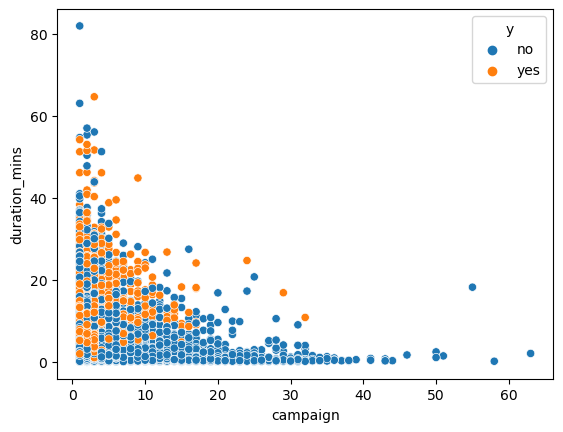

In [69]:
sns.scatterplot(data=df,x=df.campaign,y=df.duration_mins,hue=df.y)

The duration is more if the number of campaign is as minimal as possible. It is in this region that the customer is most likely to subscribe.


<Axes: xlabel='previous', ylabel='duration_mins'>

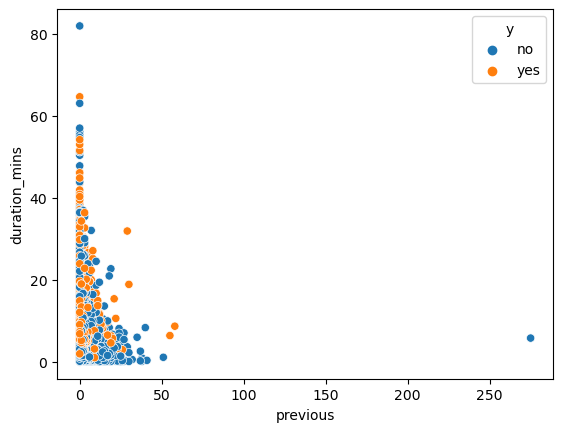

In [70]:
sns.scatterplot(data=df,x=df.previous,y=df.duration_mins,hue=df.y)

<Axes: xlabel='poutcome', ylabel='count'>

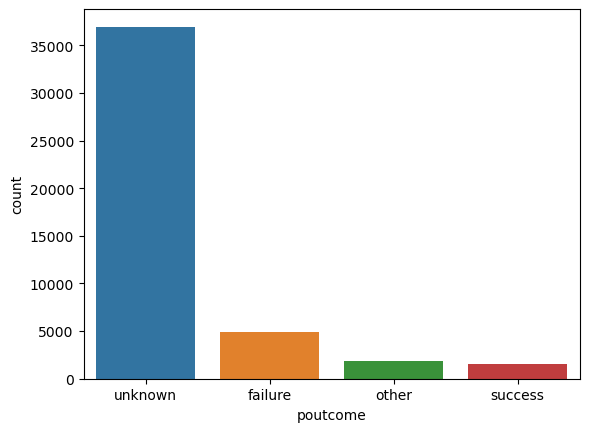

In [71]:
sns.countplot(data=df,x='poutcome')

Most of the people tend not to tell their decisions regarding the campaigns held

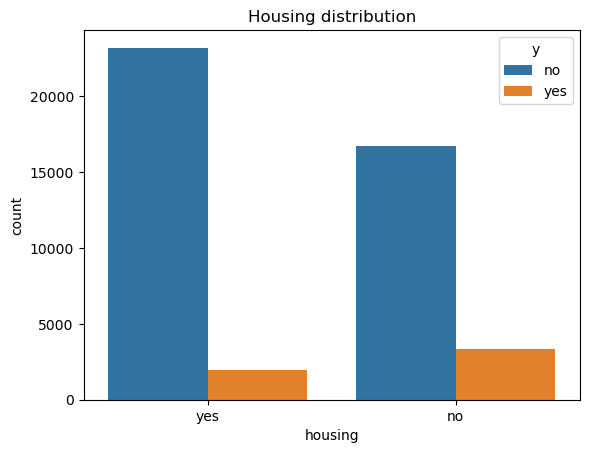

In [72]:
sns.countplot(data=df, x='housing',hue=df.y)
plt.title('Housing distribution')
plt.show()

People who don't have a housing loan tend to go for subscribing for term insurance

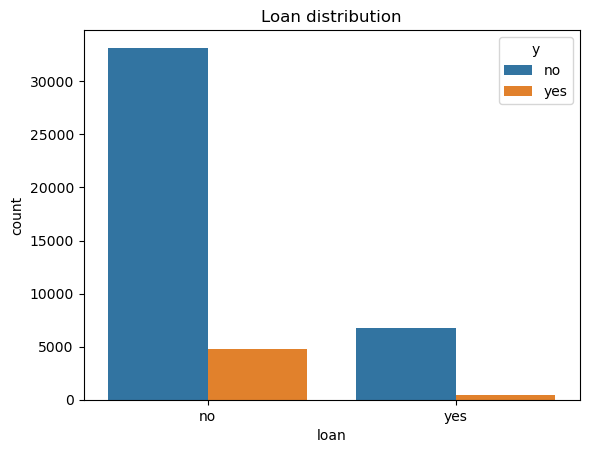

In [73]:
sns.countplot(data=df, x='loan',hue=df.y)
plt.title('Loan distribution')
plt.show()

People who don't have any previous loan tend to go for subscribing for term insurance

# 5. Encoding

In [74]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,duration_mins,month_number,Age Group,Age code
27859,45,housemaid,married,primary,no,1526.0,yes,no,telephone,28,jan,1,1,0,unknown,no,1.816667,1,40-49,4.0
28326,56,management,single,tertiary,no,545.0,yes,no,cellular,29,jan,1,1,0,unknown,no,1.433333,1,50-59,5.0
28325,37,technician,married,tertiary,no,183.0,yes,no,cellular,29,jan,1,258,1,failure,no,0.850000,1,30-39,3.0
28324,34,admin.,single,secondary,no,391.0,yes,no,cellular,29,jan,1,265,2,failure,no,1.283333,1,30-39,3.0
28323,35,blue-collar,married,secondary,no,645.0,yes,no,cellular,29,jan,1,1,0,unknown,no,1.900000,1,30-39,3.0


In [75]:
df=df.drop(['Age Group','Age code'],axis=1)

In [76]:
cat_features=df.dtypes[df.dtypes=='object'].index
cat_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [77]:
cat_col=df[cat_features]
cat_col.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
27859,housemaid,married,primary,no,yes,no,telephone,jan,unknown,no
28326,management,single,tertiary,no,yes,no,cellular,jan,unknown,no
28325,technician,married,tertiary,no,yes,no,cellular,jan,failure,no
28324,admin.,single,secondary,no,yes,no,cellular,jan,failure,no
28323,blue-collar,married,secondary,no,yes,no,cellular,jan,unknown,no


In [78]:
cat_col.shape

(45211, 10)

In [79]:
def cols_encoder(cat_col,columns):
    le=LabelEncoder()
    for column in columns:
        cat_col[column+'encoded']=le.fit_transform(cat_col[column])
    return cat_col

In [80]:
cols_encoder(cat_col,cat_features)

,job,marital,education,default,housing,loan,contact,month,poutcome,y,jobencoded,maritalencoded,educationencoded,defaultencoded,housingencoded,loanencoded,contactencoded,monthencoded,poutcomeencoded,yencoded
27859,housemaid,married,primary,no,yes,no,telephone,jan,unknown,no,3,1,0,0,1,0,1,4,3,0
28326,management,single,tertiary,no,yes,no,cellular,jan,unknown,no,4,2,2,0,1,0,0,4,3,0
28325,technician,married,tertiary,no,yes,no,cellular,jan,failure,no,9,1,2,0,1,0,0,4,0,0
28324,admin.,single,secondary,no,yes,no,cellular,jan,failure,no,0,2,1,0,1,0,0,4,0,0
28323,blue-collar,married,secondary,no,yes,no,cellular,jan,unknown,no,1,1,1,0,1,0,0,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42500,technician,married,tertiary,no,no,no,cellular,dec,other,no,9,1,2,0,0,0,0,2,1,0
42499,management,single,tertiary,no,no,no,cellular,dec,success,yes,4,2,2,0,0,0,0,2,2,1
42498,services,single,tertiary,no,no,no,cellular,dec,success,no,7,2,2,0,0,0,0,2,2,0
42511,blue-collar,single,secondary,no,no,no,cellular,dec,unknown,yes,1,2,1,0,0,0,0,2,3,1


In [81]:
cat_col=cat_col.drop(cat_features,axis=1)

In [82]:
cat_col

,jobencoded,maritalencoded,educationencoded,defaultencoded,housingencoded,loanencoded,contactencoded,monthencoded,poutcomeencoded,yencoded
27859,3,1,0,0,1,0,1,4,3,0
28326,4,2,2,0,1,0,0,4,3,0
28325,9,1,2,0,1,0,0,4,0,0
28324,0,2,1,0,1,0,0,4,0,0
28323,1,1,1,0,1,0,0,4,3,0
...,...,...,...,...,...,...,...,...,...,...
42500,9,1,2,0,0,0,0,2,1,0
42499,4,2,2,0,0,0,0,2,2,1
42498,7,2,2,0,0,0,0,2,2,0
42511,1,2,1,0,0,0,0,2,3,1


In [83]:
cat_col=cat_col.drop('yencoded',axis=1)

In [84]:
cat_col.reset_index()

,index,jobencoded,maritalencoded,educationencoded,defaultencoded,housingencoded,loanencoded,contactencoded,monthencoded,poutcomeencoded
0,27859,3,1,0,0,1,0,1,4,3
1,28326,4,2,2,0,1,0,0,4,3
2,28325,9,1,2,0,1,0,0,4,0
3,28324,0,2,1,0,1,0,0,4,0
4,28323,1,1,1,0,1,0,0,4,3
...,...,...,...,...,...,...,...,...,...,...
45206,42500,9,1,2,0,0,0,0,2,1
45207,42499,4,2,2,0,0,0,0,2,2
45208,42498,7,2,2,0,0,0,0,2,2
45209,42511,1,2,1,0,0,0,0,2,3


# 6. Scaling

In [85]:
num_featues=df.dtypes[df.dtypes!='object'].index

In [86]:
num_featues

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'duration_mins', 'month_number'],
      dtype='object')

In [87]:
num_col=df[num_featues]

In [88]:
num_col.reset_index()

,index,age,balance,day,campaign,pdays,previous,duration_mins,month_number
0,27859,45,1526.0,28,1,1,0,1.816667,1
1,28326,56,545.0,29,1,1,0,1.433333,1
2,28325,37,183.0,29,1,258,1,0.850000,1
3,28324,34,391.0,29,1,265,2,1.283333,1
4,28323,35,645.0,29,1,1,0,1.900000,1
...,...,...,...,...,...,...,...,...,...
45206,42500,45,115.0,16,1,194,1,2.450000,12
45207,42499,29,572.0,16,1,195,1,5.233333,12
45208,42498,26,12.0,15,4,186,6,1.200000,12
45209,42511,28,1705.0,17,2,1,0,6.866667,12


In [89]:
num_col

,age,balance,day,campaign,pdays,previous,duration_mins,month_number
27859,45,1526.0,28,1,1,0,1.816667,1
28326,56,545.0,29,1,1,0,1.433333,1
28325,37,183.0,29,1,258,1,0.850000,1
28324,34,391.0,29,1,265,2,1.283333,1
28323,35,645.0,29,1,1,0,1.900000,1
...,...,...,...,...,...,...,...,...
42500,45,115.0,16,1,194,1,2.450000,12
42499,29,572.0,16,1,195,1,5.233333,12
42498,26,12.0,15,4,186,6,1.200000,12
42511,28,1705.0,17,2,1,0,6.866667,12


In [90]:
merge=pd.concat([cat_col,num_col],axis=1)

In [91]:
merge.isnull().sum()

jobencoded          0
maritalencoded      0
educationencoded    0
defaultencoded      0
housingencoded      0
loanencoded         0
contactencoded      0
monthencoded        0
poutcomeencoded     0
age                 0
balance             0
day                 0
campaign            0
pdays               0
previous            0
duration_mins       0
month_number        0
dtype: int64

In [92]:
merge.head()

,jobencoded,maritalencoded,educationencoded,defaultencoded,housingencoded,loanencoded,contactencoded,monthencoded,poutcomeencoded,age,balance,day,campaign,pdays,previous,duration_mins,month_number
27859,3,1,0,0,1,0,1,4,3,45,1526.0,28,1,1,0,1.816667,1
28326,4,2,2,0,1,0,0,4,3,56,545.0,29,1,1,0,1.433333,1
28325,9,1,2,0,1,0,0,4,0,37,183.0,29,1,258,1,0.850000,1
28324,0,2,1,0,1,0,0,4,0,34,391.0,29,1,265,2,1.283333,1
28323,1,1,1,0,1,0,0,4,3,35,645.0,29,1,1,0,1.900000,1


In [93]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(merge)

In [94]:
scaled_df=pd.DataFrame(scaled_data,columns=merge.columns)

In [95]:
scaled_df.head()

,jobencoded,maritalencoded,educationencoded,defaultencoded,housingencoded,loanencoded,contactencoded,monthencoded,poutcomeencoded,age,balance,day,campaign,pdays,previous,duration_mins,month_number
0,-0.409385,-0.275762,-1.637474,-0.13549,0.893915,-0.436803,0.402467,-0.50651,0.444898,0.382703,0.053346,1.465155,-0.569351,-0.410560,-0.251940,-0.578331,-2.136478
1,-0.103820,1.368372,1.036362,-0.13549,0.893915,-0.436803,-0.711866,-0.50651,0.444898,1.418617,-0.269098,1.585313,-0.569351,-0.410560,-0.251940,-0.666743,-2.136478
2,1.424008,-0.275762,1.036362,-0.13549,0.893915,-0.436803,-0.711866,-0.50651,-2.588321,-0.370689,-0.388083,1.585313,-0.569351,2.173504,0.182198,-0.801284,-2.136478
3,-1.326082,1.368372,-0.300556,-0.13549,0.893915,-0.436803,-0.711866,-0.50651,-2.588321,-0.653211,-0.319716,1.585313,-0.569351,2.243887,0.616335,-0.701339,-2.136478
4,-1.020516,-0.275762,-0.300556,-0.13549,0.893915,-0.436803,-0.711866,-0.50651,0.444898,-0.559037,-0.236229,1.585313,-0.569351,-0.410560,-0.251940,-0.559111,-2.136478


# 7. Dependent Independent Split

In [96]:
X=scaled_df

In [97]:
X.head()

,jobencoded,maritalencoded,educationencoded,defaultencoded,housingencoded,loanencoded,contactencoded,monthencoded,poutcomeencoded,age,balance,day,campaign,pdays,previous,duration_mins,month_number
0,-0.409385,-0.275762,-1.637474,-0.13549,0.893915,-0.436803,0.402467,-0.50651,0.444898,0.382703,0.053346,1.465155,-0.569351,-0.410560,-0.251940,-0.578331,-2.136478
1,-0.103820,1.368372,1.036362,-0.13549,0.893915,-0.436803,-0.711866,-0.50651,0.444898,1.418617,-0.269098,1.585313,-0.569351,-0.410560,-0.251940,-0.666743,-2.136478
2,1.424008,-0.275762,1.036362,-0.13549,0.893915,-0.436803,-0.711866,-0.50651,-2.588321,-0.370689,-0.388083,1.585313,-0.569351,2.173504,0.182198,-0.801284,-2.136478
3,-1.326082,1.368372,-0.300556,-0.13549,0.893915,-0.436803,-0.711866,-0.50651,-2.588321,-0.653211,-0.319716,1.585313,-0.569351,2.243887,0.616335,-0.701339,-2.136478
4,-1.020516,-0.275762,-0.300556,-0.13549,0.893915,-0.436803,-0.711866,-0.50651,0.444898,-0.559037,-0.236229,1.585313,-0.569351,-0.410560,-0.251940,-0.559111,-2.136478


In [98]:
y=df['y']

In [99]:
y

27859     no
28326     no
28325     no
28324     no
28323     no
        ... 
42500     no
42499    yes
42498     no
42511    yes
27727    yes
Name: y, Length: 45211, dtype: object

In [100]:
y=pd.get_dummies(data=df.y,drop_first=True)

In [101]:
y.head()

,yes
27859,0
28326,0
28325,0
28324,0
28323,0


# 8. Feature selection

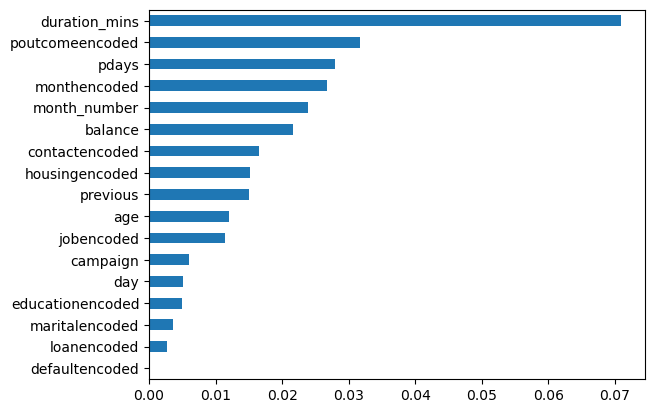

In [102]:
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances,X.columns)
sorted_importances = feat_importances.sort_values()
sorted_importances.plot(kind='barh')
plt.show()

In [103]:
sorted_importances.sort_values(ascending = False)

duration_mins       0.070968
poutcomeencoded     0.031625
pdays               0.027893
monthencoded        0.026746
month_number        0.023802
balance             0.021691
contactencoded      0.016505
housingencoded      0.015114
previous            0.014952
age                 0.011964
jobencoded          0.011437
campaign            0.006022
day                 0.005116
educationencoded    0.004941
maritalencoded      0.003580
loanencoded         0.002659
defaultencoded      0.000000
dtype: float64

In [104]:
X=X.drop(['age','jobencoded','campaign','day','loanencoded','educationencoded','maritalencoded','defaultencoded'],axis=1)

# 9. Test Train Split

In [105]:
X.head()

,housingencoded,contactencoded,monthencoded,poutcomeencoded,balance,pdays,previous,duration_mins,month_number
0,0.893915,0.402467,-0.50651,0.444898,0.053346,-0.410560,-0.251940,-0.578331,-2.136478
1,0.893915,-0.711866,-0.50651,0.444898,-0.269098,-0.410560,-0.251940,-0.666743,-2.136478
2,0.893915,-0.711866,-0.50651,-2.588321,-0.388083,2.173504,0.182198,-0.801284,-2.136478
3,0.893915,-0.711866,-0.50651,-2.588321,-0.319716,2.243887,0.616335,-0.701339,-2.136478
4,0.893915,-0.711866,-0.50651,0.444898,-0.236229,-0.410560,-0.251940,-0.559111,-2.136478


In [106]:
y.head()

,yes
27859,0
28326,0
28325,0
28324,0
28323,0


In [119]:
X_train0, X_test, y_train0, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
print(f'X-train shape={X_train0.shape}  X-test shape={X_test.shape}  y-train shape={y_train0.shape}  y-test shape={y_test.shape}')

X-train shape=(31647, 9)  X-test shape=(13564, 9)  y-train shape=(31647, 1)  y-test shape=(13564, 1)


# 10. SMOTE Analysis

In [121]:
smote = SMOTE(random_state=42)
X_train, y_train= smote.fit_resample(X_train0, y_train0)


# 8. Model Building

In [122]:
algos=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier()]
names=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier']
rmse_list=[]
r2_s=[]
r2_t=[]


In [123]:
for name in algos:
    model=name
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_pred=model.predict(X_test)
    confusion_matrix(y_train,y_train_pred)
    print('Confusion Matrix for Train Data\n',confusion_matrix(y_train,y_train_pred))
    print(name,"Classification Report")
    print(classification_report(y_train,y_train_pred))
    print('Confusion Matrix for Test Data\n',confusion_matrix(y_test,y_pred))
    print(name,"Classification Report")
    print(classification_report(y_test,y_pred))

Confusion Matrix for Train Data
 [[22701  5290]
 [ 6251 21740]]
LogisticRegression() Classification Report
              precision    recall  f1-score   support

           0       0.78      0.81      0.80     27991
           1       0.80      0.78      0.79     27991

    accuracy                           0.79     55982
   macro avg       0.79      0.79      0.79     55982
weighted avg       0.79      0.79      0.79     55982

Confusion Matrix for Test Data
 [[9671 2260]
 [ 383 1250]]
LogisticRegression() Classification Report
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     11931
           1       0.36      0.77      0.49      1633

    accuracy                           0.81     13564
   macro avg       0.66      0.79      0.68     13564
weighted avg       0.89      0.81      0.83     13564

Confusion Matrix for Train Data
 [[27991     0]
 [    4 27987]]
DecisionTreeClassifier() Classification Report
              precision   

# 9. Fine tuning

In [124]:
model2 = RandomForestClassifier(n_estimators = 100,min_samples_split =2, min_samples_leaf=10, max_features ='log2',max_depth =10)

In [125]:
model2.fit(X_train,y_train)
y_train_pred=model2.predict(X_train)
y_test_pred=model2.predict(X_test)

# 10. Final Model Evaluation

In [126]:
confusion_matrix(y_test,y_test_pred)
print(name,'classification report train')
print(classification_report(y_train,y_train_pred))

print(name,'classification report test')
print(classification_report(y_test,y_test_pred))

RandomForestClassifier() classification report train
              precision    recall  f1-score   support

           0       0.91      0.84      0.88     27991
           1       0.86      0.92      0.89     27991

    accuracy                           0.88     55982
   macro avg       0.89      0.88      0.88     55982
weighted avg       0.89      0.88      0.88     55982

RandomForestClassifier() classification report test
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     11931
           1       0.41      0.83      0.55      1633

    accuracy                           0.83     13564
   macro avg       0.69      0.83      0.72     13564
weighted avg       0.91      0.83      0.86     13564



### With SMOTE Analysis, performances of Random Forest:
### precision for class (0,1)=(0.98,0.41) 
### recall for class(0,1)=(0.81,0.83)
### f-1score for class(0,1)=(0.90,0.55)

### Without SMOTE Analysis, performances of Random Forest:
### precision for class (0,1)=(0.92,0.66) 
### recall for class(0,1)=(0.97,0.39)
### f-1score for class(0,1)=(0.95,0.49)

# Therefore, Random Forest Classifier with SMOTE gives better results